# read/write adjacency matrix & edgelist by igraph/networkx

In [114]:
import pandas as pd
import numpy as np
import igraph as ig


In [115]:

data = np.loadtxt('data/graph.txt', dtype=np.float32) # adjacency matrix
matrix = pd.DataFrame(data)

m = matrix.values # ndarray
g1 = ig.Graph.Adjacency((m > 0).tolist()) # default mode='directed'
g1.es['weight'] = m[m.nonzero()]
ig.plot(g1)

g1.write_adjacency('data/graph_adjacency.txt')
g1.write_edgelist('data/graph_edgelist.txt')
g1.write_pajek('data/graph_pajek.txt')


In [116]:

import networkx as nx
import matplotlib.pyplot as plt


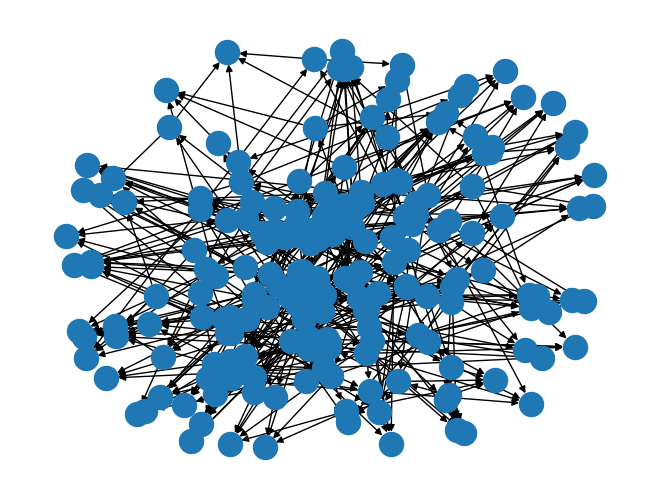

In [117]:

g1 = g1.get_edgelist()
g2 = nx.DiGraph(g1)
nx.draw(g2)
plt.show()


# pagerank

In [118]:

G = nx.barabasi_albert_graph(60,41)
pr = nx.pagerank(G)
print(pr)


{0: 0.0360723555409146, 1: 0.010302175424757636, 2: 0.010825653525739264, 3: 0.011342014472256853, 4: 0.009782714185144512, 5: 0.009772905178751862, 6: 0.011340613900832332, 7: 0.011343206535999538, 8: 0.00821782837258827, 9: 0.010295588280241873, 10: 0.008224521473212808, 11: 0.011344130630692444, 12: 0.011340271284831963, 13: 0.010823656343252346, 14: 0.006142935884759114, 15: 0.009776739126605863, 16: 0.010304636335937215, 17: 0.008227465617664815, 18: 0.011341553371468029, 19: 0.00925713658074265, 20: 0.01134058837406549, 21: 0.01134269127750512, 22: 0.009260192022210786, 23: 0.009784631259442636, 24: 0.00925189462295276, 25: 0.011866680285308129, 26: 0.010822588593606198, 27: 0.010827639321021114, 28: 0.010296879614194954, 29: 0.010301951644265816, 30: 0.010294784563452678, 31: 0.010821352430990394, 32: 0.00977889440609558, 33: 0.010824168497574853, 34: 0.010305051395798803, 35: 0.011862611770321602, 36: 0.011340271284831963, 37: 0.00977502575626098, 38: 0.010816797535523373, 39: 

# louvain

In [119]:
import community as community_louvain
import matplotlib.cm as cm

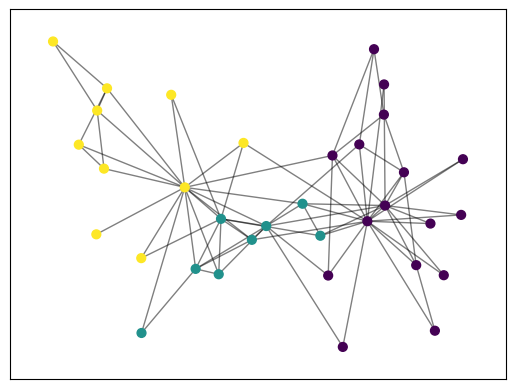

In [120]:

# load the karate club graph
G = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# generate network

MultiGraph with 50 nodes and 305 edges


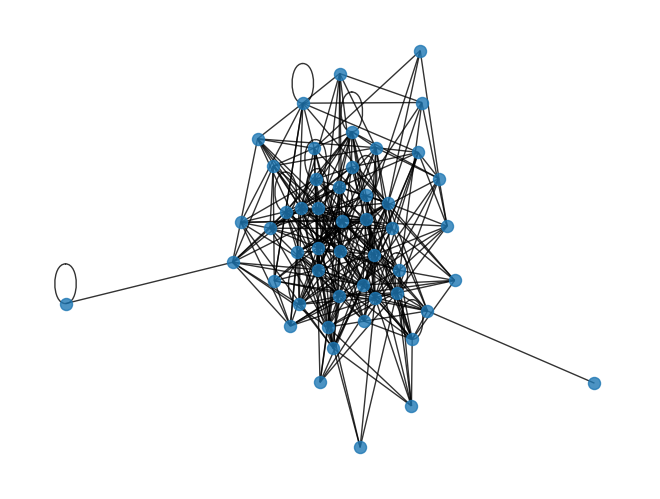

In [121]:
import random

def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)} # {0:[], 1:[], 2:[], ..., n-1:[]}
    nodes = list(range(n)) # [0, 1, 2, 3, ..., n-1]
    
    # generate edges
    for n, edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes)/2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = 50
G = generate_network(n)
print(G)

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

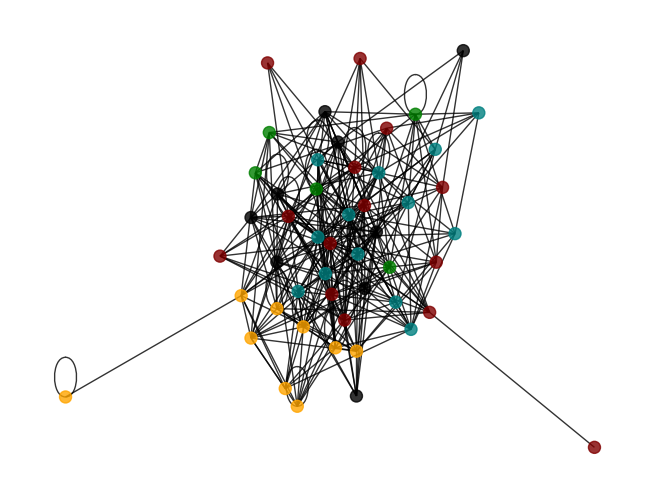

In [122]:
comms = community_louvain.best_partition(G)

unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

# girvan_newman

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


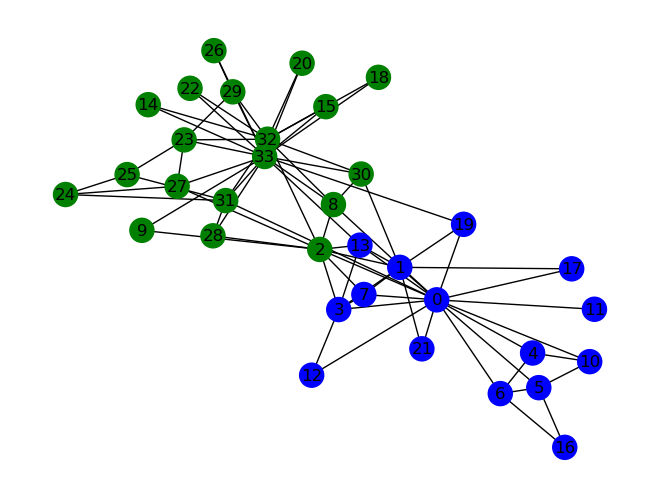

In [123]:
from networkx.algorithms.community.centrality import girvan_newman
 
G = nx.karate_club_graph()
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()